In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import GridSearchCV,KFold,cross_val_predict,cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score, roc_curve, auc
import sklearn.metrics as skm
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

In [2]:
data = pd.read_csv("C:/Users/user/OneDrive/DESKTOP/testaki_admixed2.csv")

In [3]:
data

,rs10497191,rs1079597,rs11652805,rs1229984,rs12439433,rs12498138,rs12913832,rs1426654,rs1462906,rs1572018,...,rs735480,rs7554936,rs7657799,rs7722456,rs798443,rs7997709,rs870347,rs917115,rs9522149,label
0,CT,CT,CT,TT,AA,GG,AA,GG,CC,TT,...,TT,CT,GG,TT,AA,TT,AA,CT,TT,East_Asian
1,CC,TT,TT,CT,AA,AG,AA,GG,CC,TT,...,CT,TT,GT,TT,AA,TT,CC,CC,TT,East_Asian
2,CC,CT,CT,CT,AA,GG,AA,GG,CC,TT,...,CT,TT,TT,TT,AA,CT,AC,CC,TT,East_Asian
3,CC,CC,CC,CT,AA,GG,AA,GG,CC,CT,...,TT,TT,TT,TT,AG,CT,AA,CC,TT,East_Asian
4,CC,CC,TT,CT,AA,GG,AA,GG,CC,CT,...,CT,TT,TT,TT,AG,TT,AC,CC,TT,East_Asian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,CC,CC,TT,CC,AA,GG,AA,AG,CC,CT,...,CT,TT,TT,CT,AA,TT,AA,CC,TT,EUR/OCE
2048,CC,CT,TT,CC,AA,GG,AG,AG,CC,CT,...,CT,CT,TT,CT,AA,TT,AA,CC,CT,EUR/OCE
2049,CC,CC,TT,CT,AA,GG,AG,AG,CC,CT,...,CT,TT,TT,CT,AA,TT,AC,CC,TT,EUR/OCE
2050,CC,CT,TT,CC,AA,GG,AG,AG,CC,TT,...,CT,CT,TT,CT,AA,TT,AA,CT,CT,EUR/OCE


In [4]:
def get_unknown_sample(data):
    data_nolabel=data.drop('label',axis=1)
    cols=data_nolabel.columns 
    data_nolabel_onehot_sample=pd.get_dummies(data_nolabel, columns=cols)
    sample = data_nolabel_onehot_sample.iloc[-1,:]
    sample = pd.DataFrame(sample)
    new_sample=sample.T
    new_sample=new_sample.reset_index(drop=True)
    return new_sample

In [5]:
new_sample=get_unknown_sample(data)
new_sample

,rs10497191_CC,rs10497191_CT,rs10497191_TT,rs1079597_CC,rs1079597_CT,rs1079597_TT,rs11652805_CC,rs11652805_CT,rs11652805_TT,rs1229984_CC,...,rs7997709_TT,rs870347_AA,rs870347_AC,rs870347_CC,rs917115_CC,rs917115_CT,rs917115_TT,rs9522149_CC,rs9522149_CT,rs9522149_TT
0,1,0,0,0,1,0,0,0,1,1,...,1,1,0,0,0,1,0,0,1,0


In [6]:
def get_data_nolabel(data):
    data2 = data.drop(data.tail(1).index, axis=0)
    data3=data2.drop(('label'), axis=1)
    x=data3.columns
    new_data=pd.get_dummies(data3, columns=x)
    return new_data

In [7]:
new_data=get_data_nolabel(data)
new_data

,rs10497191_CC,rs10497191_CT,rs10497191_TT,rs1079597_CC,rs1079597_CT,rs1079597_TT,rs11652805_CC,rs11652805_CT,rs11652805_TT,rs1229984_CC,...,rs7997709_TT,rs870347_AA,rs870347_AC,rs870347_CC,rs917115_CC,rs917115_CT,rs917115_TT,rs9522149_CC,rs9522149_CT,rs9522149_TT
0,0,1,0,0,1,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,1
1,1,0,0,0,0,1,0,0,1,0,...,1,0,0,1,1,0,0,0,0,1
2,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
3,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,1,0,0,1,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1,0,0,1,0,0,0,0,1,1,...,1,1,0,0,0,1,0,0,0,1
2047,1,0,0,1,0,0,0,0,1,1,...,1,1,0,0,1,0,0,0,0,1
2048,1,0,0,0,1,0,0,0,1,1,...,1,1,0,0,1,0,0,0,1,0
2049,1,0,0,1,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,1


In [8]:
#All columns except for the label column
X=new_data.iloc[:,:]

In [9]:
#Only the label column
Y=data.iloc[:,-1]
Y = Y.drop(data.tail(1).index, axis=0)

In [10]:
#defining the inner and outer loop of the nested cross validation scheme
outer_kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
inner_kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=2)

In [11]:
#search space for GridSearchCV (inner loop)
params = {'C': [0.1, 1, 10], #100
              'gamma': [1, 0.1, 0.01],#0.001
              'kernel': ['rbf','linear']} #sigmoid
svm_mod=SVC(probability=True) 

In [12]:
#nested cross validation scheme
from matplotlib import pyplot as plt2
from itertools import cycle
outer_loop_accuracy_scores = []
inner_loop_won_params = []
inner_loop_accuracy_scores = []
best_param = []
xtrain,ytrain,xtest,ytest=[],[],[],[]
k=1

# Looping through the outer loop, feeding each training set into a GSCV as the inner loop
for train_index,test_index in outer_kf.split(X,Y):


    GSCV = GridSearchCV(svm_mod,params,cv=inner_kf)
    
    # GSCV is looping through the training data to find the best parameters. This is the inner loop
    GSCV.fit(X.iloc[train_index],Y[train_index])
    xtrain.append(X.iloc[train_index])
    ytrain.append(Y[train_index])
  
    # The best hyper parameters from GSCV is now being tested on the unseen outer loop test data.
    pred = GSCV.predict(X.iloc[test_index])
    xtest.append(X.iloc[test_index])
    print(GSCV.best_params_)

    # Appending the "winning" hyper parameters and their associated accuracy score
    inner_loop_won_params.append(GSCV.best_estimator_.get_params())

    outer_loop_accuracy_scores.append(accuracy_score(Y[test_index],pred))
    ytest.append(Y[test_index])
    print(skm.classification_report(Y[test_index],pred))
    inner_loop_accuracy_scores.append(GSCV.best_score_)
    
    
#     class_list = ['South_Asian','European', 'EUR/SAS','East_Asian','EUR/EAS','Native_American','EUR/NAM','Oceanian','EUR/OCE','Sub_Saharan_African','EUR/SAF']
#     y = label_binarize(Y[test_index], classes=class_list)
#     bin_pred = label_binarize(pred, classes= class_list)
#     n_classes = 11

#     # Compute ROC curve and ROC area for each class (Onevs.Rest scheme)
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()

#     for i in range(n_classes):
#         fpr[i], tpr[i], _ = roc_curve(y[:, i], bin_pred[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])

#     # Plot of a ROC curve for a specific class
#     for i in range(n_classes):
#         #plt.figure()
#         plt.plot(fpr[i], tpr[i], label='(AUC = %0.2f)' % (roc_auc[i]))
#         plt.plot([0, 1], [0, 1], 'k--')

#     plt.xlim([-0.01, 1.0])
#     plt.ylim([-0.01, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver operating characteristic SVM')
#     plt.legend(loc="lower right")
#     plt2.savefig('rocsvm{0}.jpg'.format(k))
#     plt.show()
#     k=k+1







#     fig, ax = plt.subplots(figsize=(6, 6))
    

#     colors = cycle(["aqua", "darkorange", "cornflowerblue"])
#     for i, color in zip(range(n_classes), colors):
#         RocCurveDisplay.from_predictions(
#             bin_pred[:, i],
#             y[:, i],
#             name=f"ROC curve for {class_list[i]}",
#             color=color,
#             ax=ax
#         )

# plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
# plt.axis("square")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
# plt.legend()
# plt.show()

      
for i in zip(outer_loop_accuracy_scores,inner_loop_accuracy_scores, inner_loop_won_params):
    print(i)

print('Mean of outer loop accuracy score:',np.mean(outer_loop_accuracy_scores))

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
                     precision    recall  f1-score   support

            EUR/EAS       1.00      1.00      1.00         8
            EUR/NAM       1.00      1.00      1.00         3
            EUR/OCE       1.00      1.00      1.00         4
            EUR/SAF       1.00      1.00      1.00        10
            EUR/SAS       1.00      0.60      0.75        10
         East_Asian       1.00      1.00      1.00       100
           European       0.98      1.00      0.99        99
    Native_American       1.00      1.00      1.00         7
           Oceanian       1.00      1.00      1.00         3
        South_Asian       0.97      1.00      0.99        67
Sub_Saharan_African       1.00      1.00      1.00       100

           accuracy                           0.99       411
          macro avg       1.00      0.96      0.98       411
       weighted avg       0.99      0.99      0.99       411

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'

In [13]:
#create a new svm object for final predicitons selecting a "concensus" model from the above
clf_final=SVC(probability=True,kernel='rbf',C=10,gamma=0.01)

In [14]:
clf_final.fit(xtrain[3],ytrain[3])

SVC(C=10, gamma=0.01, probability=True)

In [15]:
a=clf_final.predict(xtest[3])

In [16]:
print(skm.classification_report(ytest[3],a))

                     precision    recall  f1-score   support

            EUR/EAS       1.00      1.00      1.00         8
            EUR/NAM       1.00      1.00      1.00         3
            EUR/OCE       1.00      0.75      0.86         4
            EUR/SAF       1.00      0.90      0.95        10
            EUR/SAS       0.89      0.80      0.84        10
         East_Asian       1.00      1.00      1.00        99
           European       0.99      0.99      0.99        99
    Native_American       1.00      1.00      1.00         7
           Oceanian       1.00      1.00      1.00         3
        South_Asian       0.96      1.00      0.98        68
Sub_Saharan_African       1.00      1.00      1.00        99

           accuracy                           0.99       410
          macro avg       0.99      0.95      0.96       410
       weighted avg       0.99      0.99      0.99       410



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 2340x1800 with 0 Axes>

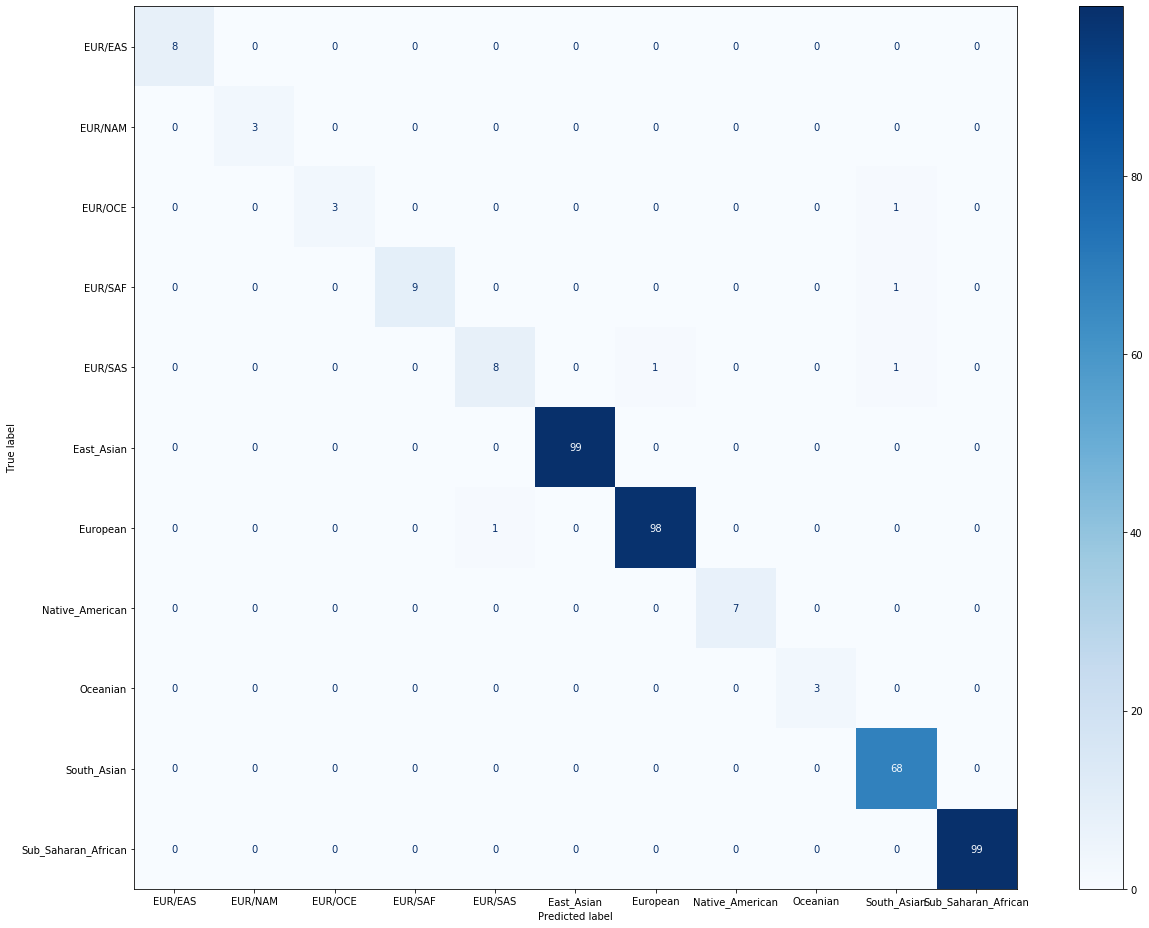

<Figure size 2340x1800 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(18, 13))
plot_confusion_matrix(clf_final, xtest[3], ytest[3], cmap=plt.cm.Blues, ax=ax, values_format='d')

plt.tight_layout()
plt.savefig('conf_SVM.jpg')

figure(figsize=(13, 10), dpi=180)

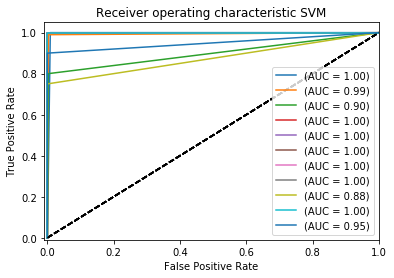

In [72]:
    class_list = ['South_Asian','European', 'EUR/SAS','East_Asian','EUR/EAS','Native_American','EUR/NAM','Oceanian','EUR/OCE','Sub_Saharan_African','EUR/SAF']
    y = label_binarize(ytest[3], classes=class_list)
    bin_pred = label_binarize(a, classes= class_list)
    n_classes = 11

    # Compute ROC curve and ROC area for each class (Onevs.Rest scheme)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y[:, i], bin_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot of a ROC curve for a specific class
    for i in range(n_classes):
        #plt.figure()
        plt.plot(fpr[i], tpr[i], label='(AUC = %0.2f)' % (roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')

    plt.xlim([-0.01, 1.0])
    plt.ylim([-0.01, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic SVM')
    plt.legend(loc="lower right")
    plt.savefig('rocsvm_finalll.jpg')
    plt.show()
    k=k+1


In [73]:
clf_final.predict_proba(new_sample)

array([[0.09090559, 0.02022103, 0.7666631 , 0.01151426, 0.04986647,
        0.00636127, 0.0161174 , 0.00807911, 0.00568749, 0.02013427,
        0.00445001]])